 <font size="10">Méthodes de segmentation et résultats</font>

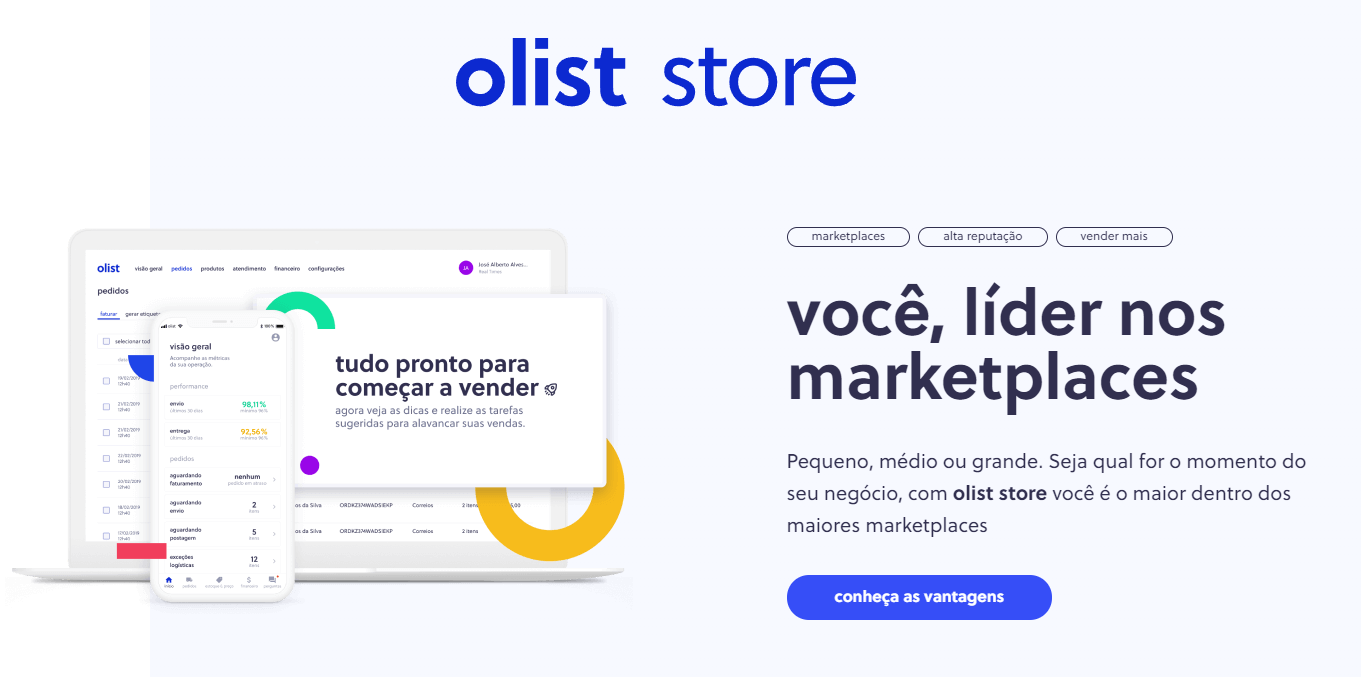

# Importation et préparation des données

Avant de commencer, nous vérifions que le code fourni respecte la convention PEP8.

In [1]:
# numpy and pandas pour la manipulation des données
import numpy as np
import pandas as pd
# matplotlib and seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# File system management
import os

# Suppress warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
a, b, c, d, e = [
    plt.cm.Blues, plt.cm.Oranges, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples
]

from my_functions import *

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import matplotlib.cm as cm
import plotly.graph_objs as go

In [4]:
df.head(2)

customer_unique_id  nb_commandes  total_depense  \
0  0000366f3b9a7992bf8c76cfdf3221e2             1          129.9   
1  0000b849f77a49e4a4ce2b2a4ca5be3f             1           18.9   

   moy_nb_moyens_paiements  moy_tot_versements_paiements  moy_review_score  \
0                      1.0                           8.0               5.0   
1                      1.0                           1.0               4.0   

   moy_delai_livraison  autres  cadeaux  denrees_alimentaires  ...  \
0                  6.0     0.0      0.0                   0.0  ...   
1                  3.0     0.0      0.0                   0.0  ...   

   freight_ratio  moy_prix_commande  moy_prix_article  \
0           0.08              129.9             129.9   
1           0.30               18.9              18.9   

   customer_zip_code_prefix  customer_city  j_derniere_commande  \
0                      7787        cajamar                  111   
1                      6053         osasco                  114   

   Etat_geo_client  geolocation_lat  geolocation_lng     d_harv  
0        São Paulo       -23.340235       -46.830140  30.784607  
1        São Paulo       -23.559115       -46.787626  15.709783  

[2 rows x 31 columns]

# DBSCAN

La méthode DBSCAN est un algorithme simple très prisé pour la définition des clusters. Cette méthode se base sur l'estimation de la densité locale (Density-Based Spatial Clustering of Applications with Noise).

Son principe est simple. D'abord, pour chaque observation, le nombre de points se trouvant au maximum à une distance ε est compté. Cet ensemble de points est appelé le ε-voisinage de l’observation.

La notion de densité intervient quand l'observation et ses voisins sont plus nombreux qu'un certain nombre. A ce moment là, l'observation devient une "core-observation" (core-molecule sur le schéma), c'est une observation à haute densité. 

A partir de là, toutes les observations qui sont à son voisinage font partie de son cluster. Si plusieurs core-observations sont proches les unes des autres, elles feront partie du même cluster.

Par contre, toute observation ni core, ni proche d'un core sera considérée comme du bruit (outliers / noise sur le schéma).

L'avantage de cette méthode est qu'il n'y a pas à définir le nombre de groupe à l'avance, ce qui donne une certaine flexibilité à l'algorithme. Ensuite, il suffit de moduler la distance ε (eps dans le code) et le nombre de points qui constitue un core (min_samples) et d'étudier les différents résultats.

Attention à ne pas avoir trop de points qui sont considérés comme du bruit, dans ce cas, notre modèle procédera à de l'underfitting. A l'inverse, vouloir que tous les points fassent partie d'un cluster entraînera un overfitting.

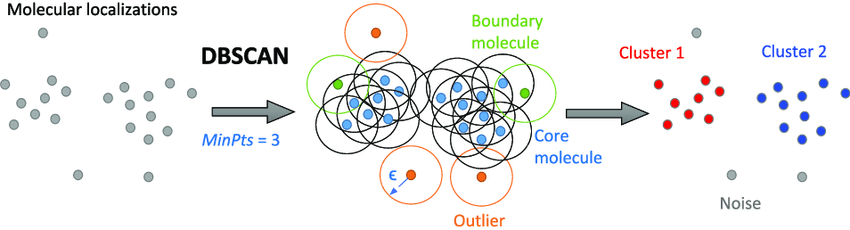

Source : *Khater, Ismail & Nabi, Ivan & Hamarneh, Ghassan. (2020). A Review of Super-Resolution Single-Molecule Localization Microscopy Cluster Analysis and Quantification Methods. Patterns. 1. 100038. 10.1016/j.patter.2020.100038.* 

## DBCAN sans les variables de catégorie et sans PCA

In [5]:
col_cats = [
    'cadeaux', 'denrees_alimentaires', 'enfants', 'maison_intérieur', 'mode',
    'multimedia', 'autres', 'produits_culturels', 'sante_bienetre', 'sport',
    'matériaux_outils'
    ]

df_ss_cat = df_nb_categories(df, col_cats)

df_ss_cat

nb_commandes  total_depense  moy_nb_moyens_paiements  \
0                 1         129.90                      1.0   
1                 1          18.90                      1.0   
2                 1          69.00                      1.0   
3                 1          25.99                      1.0   
4                 1         180.00                      1.0   
...             ...            ...                      ...   
93098             1        1570.00                      1.0   
93099             1          64.89                      1.0   
93100             1          89.90                      1.0   
93101             1         115.00                      1.0   
93102             1          56.99                      1.0   

       moy_tot_versements_paiements  moy_review_score  moy_delai_livraison  \
0                               8.0               5.0                  6.0   
1                               1.0               4.0                  3.0   
2                               8.0               3.0                 26.0   
3                               4.0               4.0                 20.0   
4                               6.0               5.0                 13.0   
...                             ...               ...                  ...   
93098                          10.0               5.0                 28.0   
93099                           1.0               4.0                 30.0   
93100                           1.0               5.0                 15.0   
93101                           5.0               5.0                 12.0   
93102                           4.0               5.0                  8.0   

       total_articles  freight_ratio  moy_prix_article  j_derniere_commande  \
0                 1.0           0.08            129.90                  111   
1                 1.0           0.30             18.90                  114   
2                 1.0           0.20             69.00                  537   
3                 1.0           0.40             25.99                  321   
4                 1.0           0.09            180.00                  288   
...               ...            ...               ...                  ...   
93098             2.0           0.24            785.00                  447   
93099             1.0           0.23             64.89                  262   
93100             1.0           0.20             89.90                  568   
93101             1.0           0.14            115.00                  119   
93102             1.0           0.20             56.99                  484   

      Etat_geo_client       d_harv  cat_differentes  
0           São Paulo    30.784607                1  
1           São Paulo    15.709783                1  
2      Santa Catarina   487.145776                1  
3                Pará  2480.782824                1  
4           São Paulo    85.358407                1  
...               ...          ...              ...  
93098      Pernambuco  2000.688657                1  
93099           Bahia  1498.216599                1  
93100     Mato Grosso  1605.208311                1  
93101  Espírito Santo   576.978793                1  
93102          Paraná   353.813889                1  

[93103 rows x 13 columns]

In [6]:
# Cette fonction retourne une base de données quantitative standardisée
X, X_sc = stdX(df_ss_cat)


*Fonction by Sandy M.*


*Fonction & Figure by Sandy M.*

Estimated number of clusters: 6
Estimated number of noise points: 353
Silhouette Coefficient: 0.404


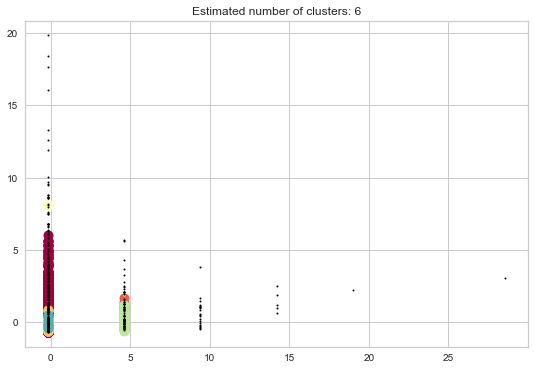

In [7]:
labels = dbscan_resultats(X_sc, 'nb_commandes', 'total_depense')

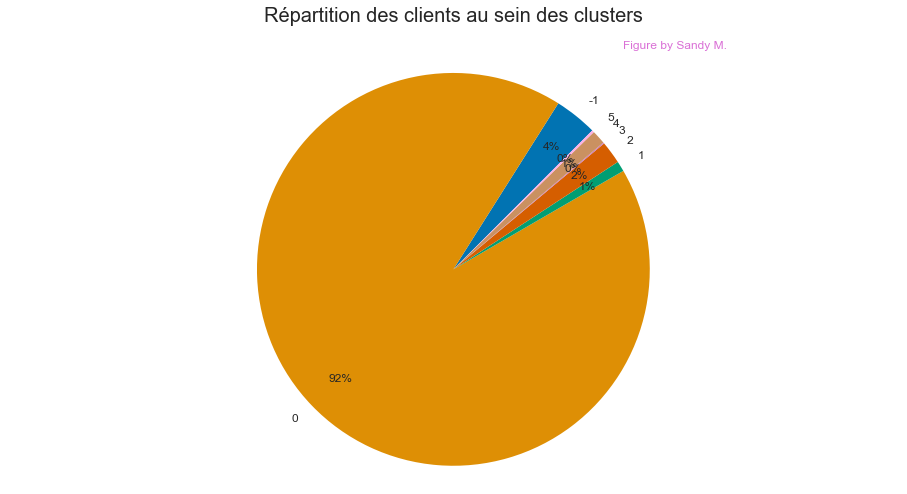

In [8]:
X = repartition_dbscan(X,labels)

On remarque déjà que la méthode ne nous donne par un partitionnement avec une bonne répartition.

Pour avoir des informations par clusters, on fait la moyenne des informations suivant le numéro du cluster (toujours avec la matrice X, non standardisée) :

Nous faisons la même chose mais cette fois avec une matrice ayant subie une transformation MinMax (pour pouvoir faire une représentation dans un cercle de rayon 1).

In [9]:
X_mm_clusters_moy = df_X_mm_clusters_dbscan(X, labels)
X_mm_clusters_moy

nb_commandes  total_depense  moy_nb_moyens_paiements  \
dbscan_label                                                         
-1                0.064212       0.137706                 0.123072   
 0                0.000000       0.027634                 0.000000   
 1                0.166667       0.047116                 0.000000   
 2                0.000000       0.023053                 1.000000   
 3                0.000000       0.440528                 0.000000   
 4                0.166667       0.042792                 0.000000   
 5                0.000000       0.036196                 0.000000   

              moy_tot_versements_paiements  moy_review_score  \
dbscan_label                                                   
-1                                0.195627          0.581554   
 0                                0.077765          0.797357   
 1                                0.096732          0.872059   
 2                                0.088012          0.852941   
 3                                0.333333          0.916667   
 4                                0.079469          0.853986   
 5                                0.037037          0.416667   

              moy_delai_livraison  total_articles  freight_ratio  \
dbscan_label                                                       
-1                       0.099234        0.093059       0.234723   
 0                       0.060275        0.005405       0.247425   
 1                       0.052522        0.057647       0.210364   
 2                       0.054906        0.002674       0.239687   
 3                       0.036245        0.000000       0.050265   
 4                       0.051957        0.056957       0.216667   
 5                       0.028520        0.052778       0.206349   

              moy_prix_article  j_derniere_commande    d_harv  cat_differentes  
dbscan_label                                                                    
-1                    0.096850             0.365484  0.242662         0.084042  
 0                    0.028381             0.341387  0.141361         0.000000  
 1                    0.023951             0.250190  0.107157         0.333333  
 2                    0.024225             0.345139  0.147047         0.000000  
 3                    0.473113             0.140368  0.098590         0.000000  
 4                    0.022260             0.355796  0.090526         0.000000  
 5                    0.019193             0.284093  0.068770         0.333333

In [10]:
cercle_kmeans(X_mm_clusters_moy, "dbscan_label")


*Figure by Sandy M.*

Nous faisons un tableau de contingence des variables selon leur quartile d'appartenance pour la variable en question.


*Table by Sandy M.*

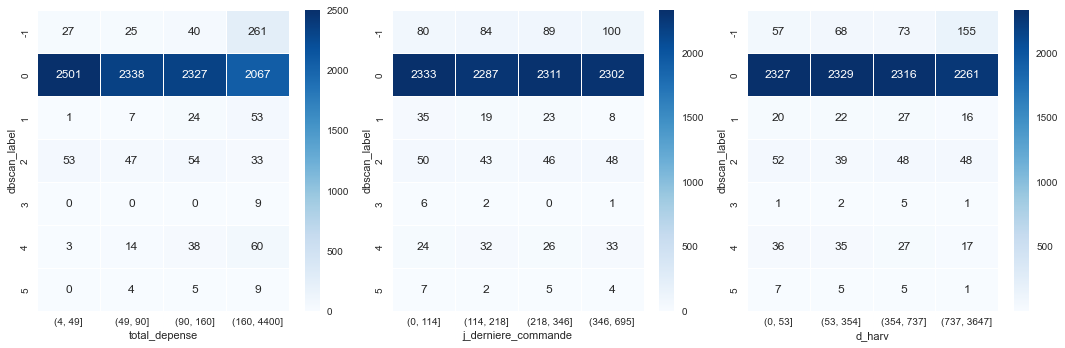

In [11]:
colonnes = ['total_depense', 'j_derniere_commande', 'd_harv']
table_cont(X,'dbscan_label',colonnes)

Encore une fois, la répartition n'est pas très bonne. Les 4 petits groupes sont pratiquement anecdotiques avec ce modèle.

Une façon synthétique de voir la répartition des différents groupes au sein de la distribution des variables est de faire un tableau qui récapitule la différence relative des moyennes d'un groupe par rapport à l'ensemble des points, pour une variable donnée.


*Table by Sandy M.*

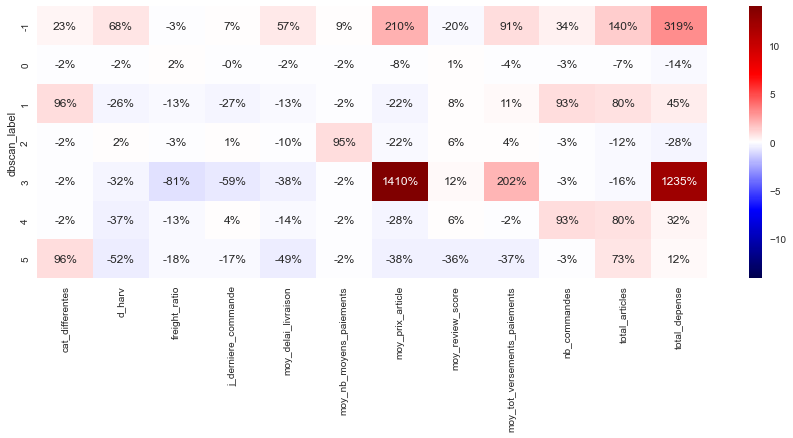

In [12]:
table_mean(X, 'dbscan_label')

Le groupe "-1" qui correspond au bruit est finalement celui avec le plus de singularité. Cette méthode DBSCAN sans la PCA ne donne pas de bons résultats. Essayons de la coupler avec une PCA.

## DBCAN sans les variables de catégorie et avec PCA

In [13]:
# Cette fonction retourne une base de données quantitative standardisée
X, X_sc = stdX(df_ss_cat)


*Fonction by Sandy M.*

In [14]:
pca = PCA(n_components=8)
X_sc = pd.DataFrame(pca.fit_transform(X_sc),
                    index=X_sc.index,
                    columns=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8'])


*Fonction & Figure by Sandy M.*

Estimated number of clusters: 5
Estimated number of noise points: 218
Silhouette Coefficient: 0.372


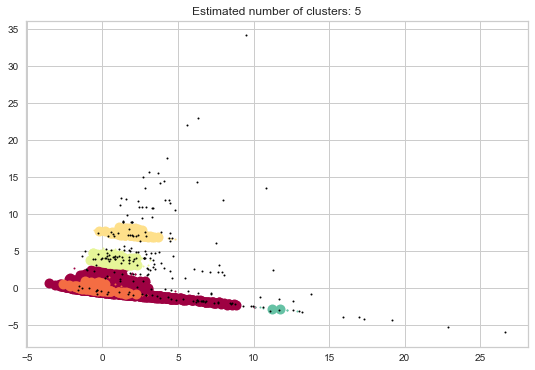

In [15]:
labels = dbscan_resultats(X_sc, 'F1', 'F2')

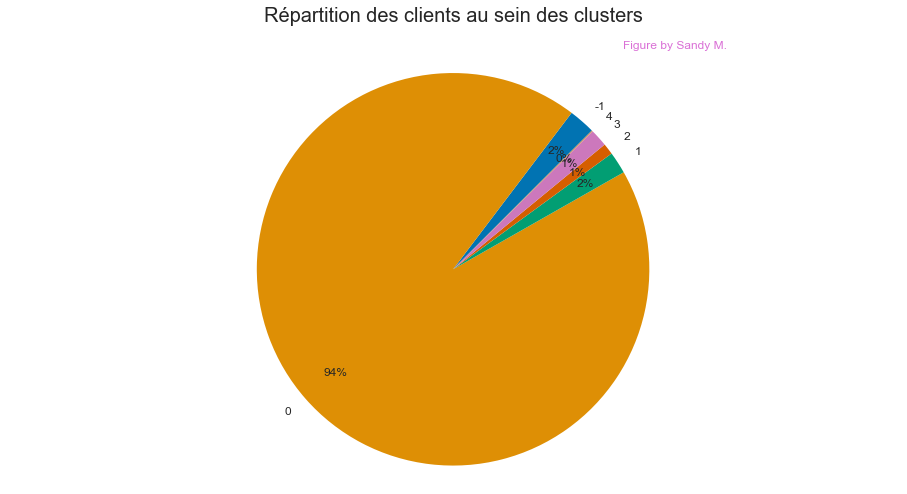

In [16]:
X = repartition_dbscan(X,labels)

In [17]:
X_mm_clusters_moy = df_X_mm_clusters_dbscan(X, labels)
X_mm_clusters_moy

nb_commandes  total_depense  moy_nb_moyens_paiements  \
dbscan_label                                                         
-1                0.109174       0.159246                 0.144495   
 0                0.000000       0.028523                 0.000000   
 1                0.000000       0.022225                 1.000000   
 2                0.200000       0.048492                 0.000000   
 3                0.150345       0.041870                 0.000000   
 4                0.000000       0.417268                 0.000000   

              moy_tot_versements_paiements  moy_review_score  \
dbscan_label                                                   
-1                                0.194579          0.579418   
 0                                0.082434          0.793212   
 1                                0.086716          0.794199   
 2                                0.111374          0.822011   
 3                                0.089055          0.745402   
 4                                0.371981          0.944444   

              moy_delai_livraison  total_articles  freight_ratio  \
dbscan_label                                                       
-1                       0.094679        0.180810       0.192087   
 0                       0.060248        0.009469       0.216267   
 1                       0.055541        0.007827       0.246547   
 2                       0.051731        0.091486       0.197464   
 3                       0.059703        0.095977       0.211207   
 4                       0.047031        0.000000       0.030093   

              moy_prix_article  j_derniere_commande    d_harv  cat_differentes  
dbscan_label                                                                    
-1                    0.096153             0.328616  0.219767         0.081422  
 0                    0.026689             0.344892  0.143083         0.000000  
 1                    0.020746             0.372435  0.157362         0.000000  
 2                    0.023397             0.294904  0.091712         0.250000  
 3                    0.019500             0.329941  0.120258         0.062069  
 4                    0.417268             0.262248  0.131063         0.000000

In [18]:
cercle_kmeans(X_mm_clusters_moy, "dbscan_label")


*Figure by Sandy M.*


*Table by Sandy M.*

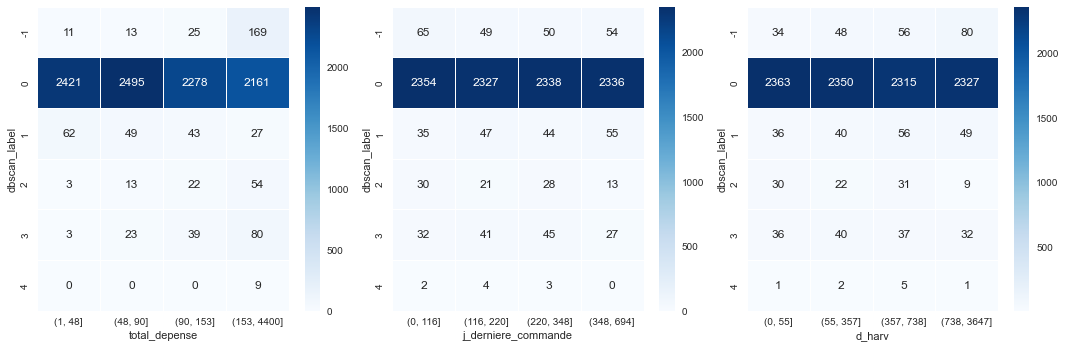

In [19]:
colonnes = ['total_depense', 'j_derniere_commande', 'd_harv']
table_cont(X,'dbscan_label',colonnes)


*Table by Sandy M.*

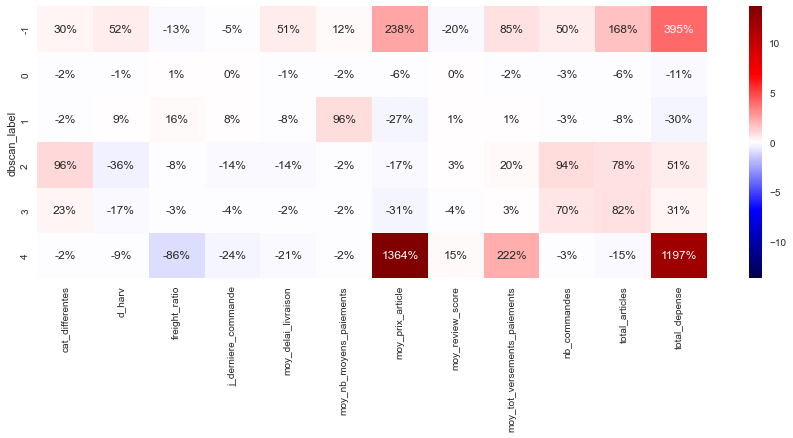

In [20]:
table_mean(X, 'dbscan_label')

Même en couplant la méthode avec une PCA, le résultat n'est pas très bon. Ceci s'explique par le fait qu'une grande majorité des clients ont un comportement très similaire : ils ne commandent qu'une seule fois, ils dépensent peu et habitent dans la région de Sao Paolo. A la différence de la méthode des K-means, le DBSCAN n'arrive pas à nuancer ces contraintes pour générer ses groupes. De plus, cette notion de bruit nuit à notre modèle car dans ce groupe il se trouve beaucoup de clients qui ont un comportement anormal (hors de la norme). Et ce sont ces clients qui sont les plus intéressants d'un point de vue marketing (ceux qui dépensent beaucoup, ceux qui commandent plusieurs fois).

# Agglomerative Clustering

La méthode d'agglomerative clustering est un type de regroupement hiérarchique. Son principe est de regrouper les observations par similarité. Au début du procédé, chaque observation est considérée comme une leaf (feuille). A chaque étape, chaque (plus ou moins petit) cluster est associé à un autre qui lui ressemble. Ils se rejoint au niveau d'un node (noeud). Ces étapes sont répétées jusqu'à ce qu'il n'y ait plus qu'un cluster géant. Comme pour les K-means, il faut définir le nombre de clusters à l'avance. Il est tout à fait possible de visualiser le dendrogramme de notre base de données. Le dendogramme représente l'arrangement des groupes générés à chaque étape. Il permet de se positionner pour choisir le nombre de cluster optimal.

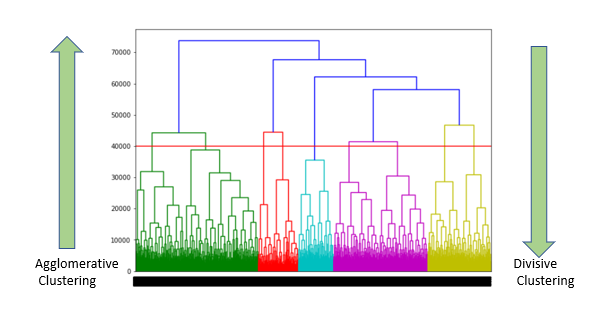

Source : *Everything on Hierarchical Clustering, Renu Khandelwal, https://pub.towardsai.net/everything-on-hierarchical-clustering-60bf613377a2*

## Hierarchical Clustering avec la base de données RFM

In [21]:
df_rfm = dataframe_rfm(df)
quartiles = df_rfm.quantile(q=[0.25, 0.5, 0.75])
df_rfm_seg = df_segmentation_rfm(df_rfm, quartiles)
data = df_rfm_seg[['R_quartile', 'F_quartile', 'M_quartile']]

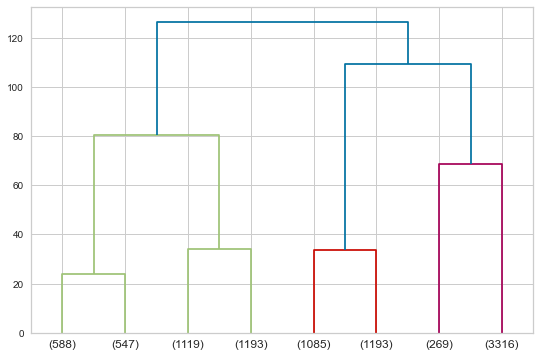

In [22]:
# Plot the hierarchical clustering of the scaled RFM variables

dendrogram(
    linkage(data.sample(frac=0.1, random_state=42), method="ward"),
    truncate_mode="level",
    p=2,
)
plt.show()

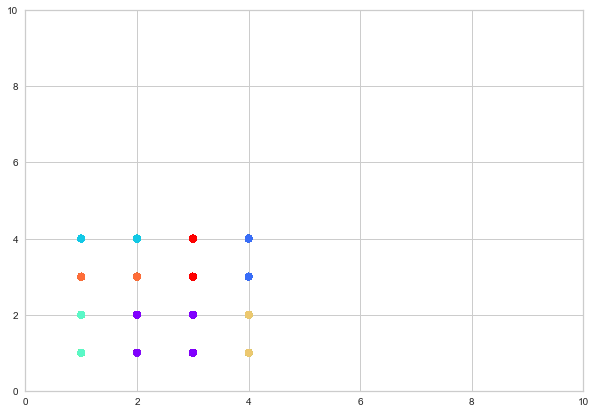

In [23]:
labels = representation_hier_clust(data, 'R_quartile','M_quartile')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

## Hierarchical Clustering avec la base de données sans catégorie sans PCA

In [24]:
# Cette fonction retourne une base de données quantitative standardisée
X, X_sc = stdX(df_ss_cat)


*Fonction by Sandy M.*

In [25]:
data = X_sc

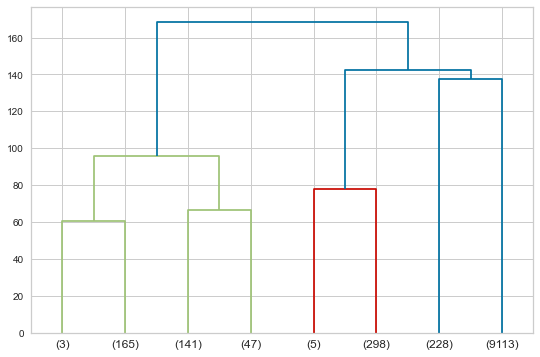

In [26]:
# Plot the hierarchical clustering of the scaled RFM variables

dendrogram(
    linkage(data, method="ward"),
    truncate_mode="level",
    p=2,
)
plt.show()

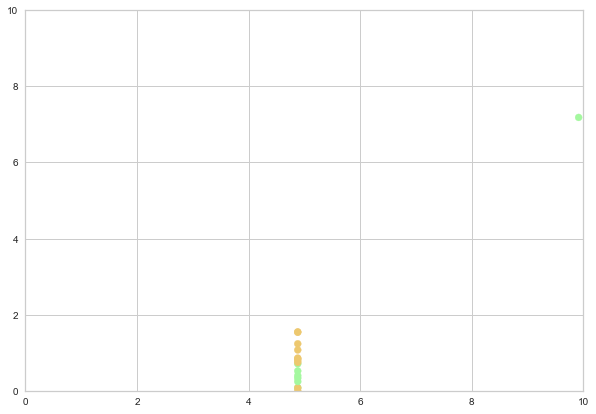

In [27]:
labels = representation_hier_clust(data, 'nb_commandes', 'total_depense')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [28]:
len(labels)

1000

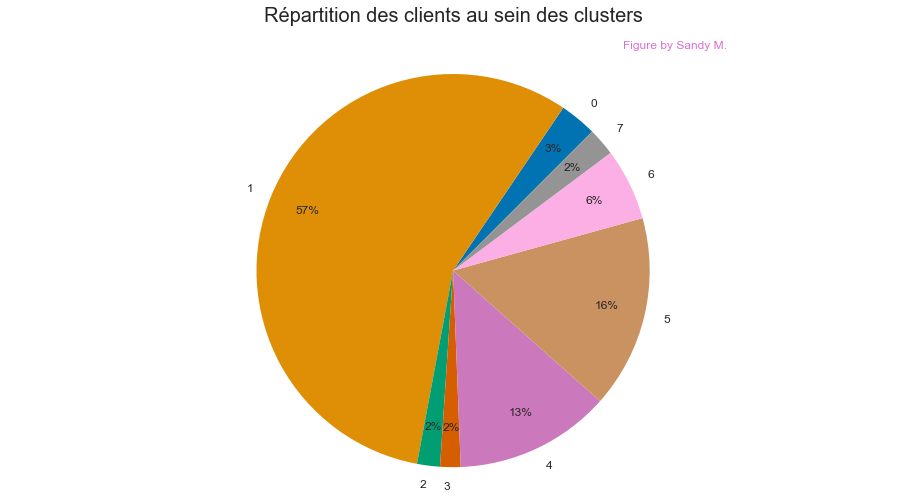

In [29]:
X, labels = repartition_agglo(data,X)

Pour avoir des informations par clusters, on fait la moyenne des informations suivant le numéro du cluster (toujours avec la matrice X, non standardisée) :

Nous faisons la même chose mais cette fois avec une matrice ayant subie une transformation MinMax (pour pouvoir faire une représentation dans un cercle de rayon 1).

In [30]:
X_mm_clusters_moy = df_X_mm_clusters_agglo(X, labels)
X_mm_clusters_moy

nb_commandes  total_depense  moy_nb_moyens_paiements  \
ac_label                                                         
0             0.000660       0.139968                 0.016502   
1             0.000000       0.011982                 0.000000   
2             0.176596       0.038994                 0.027482   
3             0.165476       0.038543                 0.037202   
4             0.000000       0.016177                 0.000000   
5             0.000000       0.030238                 0.000000   
6             0.000000       0.017229                 0.000000   
7             0.000000       0.014979                 1.000000   

          moy_tot_versements_paiements  moy_review_score  moy_delai_livraison  \
ac_label                                                                        
0                             0.240543          0.711221             0.068936   
1                             0.066554          0.894569             0.044317   
2                             0.132588          0.725890             0.055890   
3                             0.141748          0.715922             0.048915   
4                             0.117485          0.132605             0.096757   
5                             0.246581          0.907156             0.048194   
6                             0.138254          0.900760             0.079836   
7                             0.135796          0.821272             0.056955   

          total_articles  freight_ratio  moy_prix_article  \
ac_label                                                    
0               0.002432       0.064906          0.135573   
1               0.004962       0.267951          0.011131   
2               0.130179       0.279762          0.011568   
3               0.081454       0.239867          0.014792   
4               0.010879       0.266659          0.014140   
5               0.005675       0.150393          0.027468   
6               0.003823       0.358189          0.016441   
7               0.003924       0.259973          0.014259   

          j_derniere_commande    d_harv  cat_differentes  
ac_label                                                  
0                    0.335722  0.233163         0.000000  
1                    0.317509  0.108867         0.000000  
2                    0.330254  0.153148         0.010638  
3                    0.311339  0.138190         0.263393  
4                    0.349888  0.187484         0.000000  
5                    0.400958  0.109990         0.000000  
6                    0.377396  0.644406         0.000000  
7                    0.379231  0.171348         0.000000

In [31]:
cercle_kmeans(X_mm_clusters_moy, "ac_label")


*Figure by Sandy M.*

Nous faisons un tableau de contingence des variables selon leur quartile d'appartenance pour la variable en question.


*Table by Sandy M.*

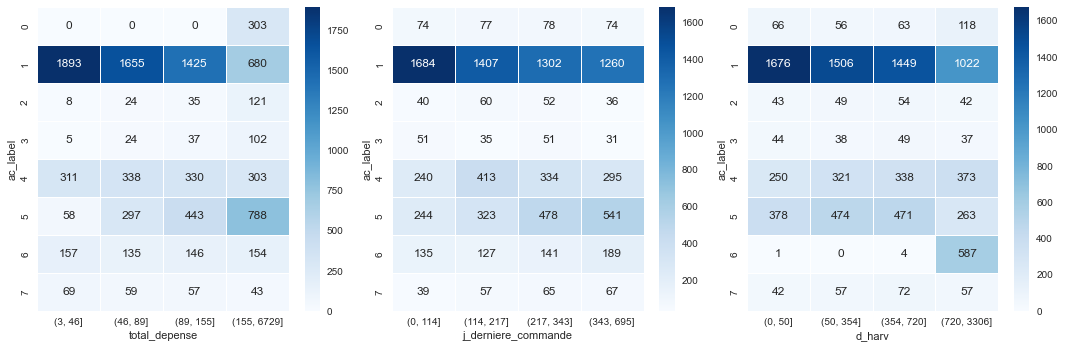

In [32]:
colonnes = ['total_depense', 'j_derniere_commande', 'd_harv']
table_cont(X,'ac_label',colonnes)

Une façon synthétique de voir la répartition des différents groupes au sein de la distribution des variables est de faire un tableau qui récapitule la différence relative des moyennes d'un groupe par rapport à l'ensemble des points, pour une variable donnée.


*Table by Sandy M.*

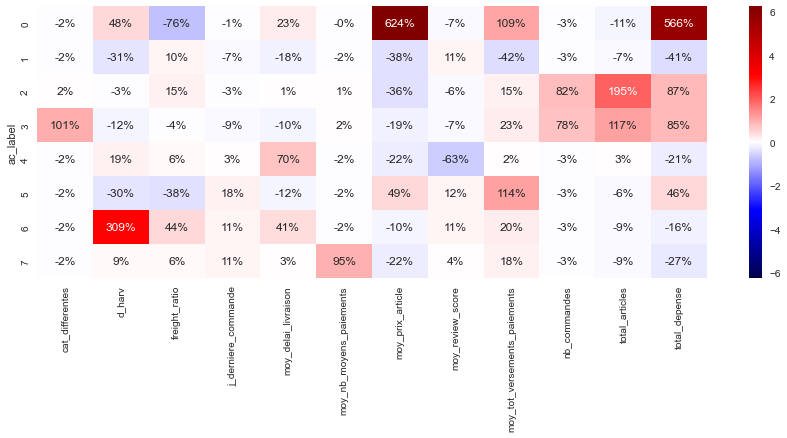

In [33]:
table_mean(X, 'ac_label')

Cette méthode sans PCA donne des groupes sans trop de nuances. Ce n'est pas une bonne méthode. Essayons de faire la même chose en y associant une PCA.

## Hierarchical Clustering avec la base de données sans catégorie avec PCA

In [34]:
# Cette fonction retourne une base de données quantitative standardisée
X, X_sc = stdX(df_ss_cat)


*Fonction by Sandy M.*

In [35]:
pca = PCA(n_components=8)
X_sc = pd.DataFrame(pca.fit_transform(X_sc),
                    index=X_sc.index,
                    columns=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8'])

In [36]:
data = X_sc

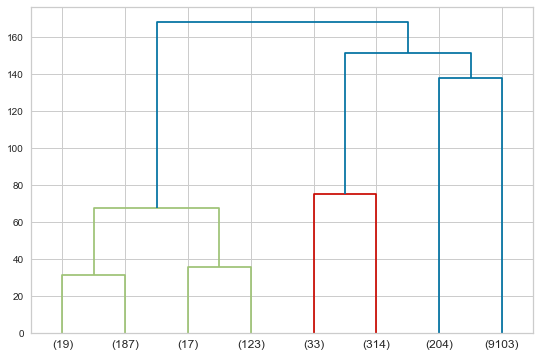

In [37]:
# Plot the hierarchical clustering of the scaled RFM variables

dendrogram(
    linkage(data, method="ward"),
    truncate_mode="level",
    p=2,
)
plt.show()

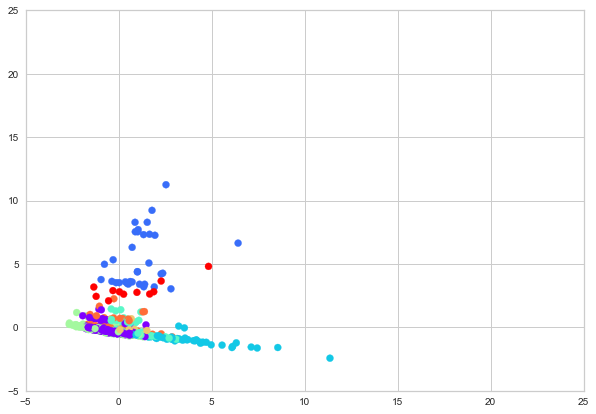

In [38]:
labels = representation_hier_clust(data, 'F1', 'F2')
plt.xlim(-5, 25)
plt.ylim(-5, 25)
plt.show()

Il est possible de voir ici que les groupes sont déjà bien plus distincts que précédemment.

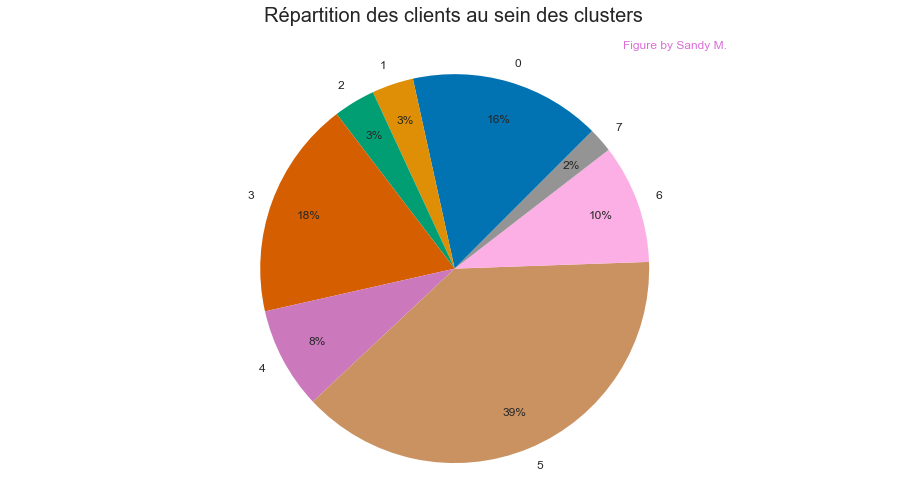

In [39]:
X, labels = repartition_agglo(data,X)

La répartition des groupes n'est pas plus optimale qu'avec la méthode des K-means mais elle est néanmoins meilleure que celle avec la méthode DBSCAN.

Pour avoir des informations par clusters, on fait la moyenne des informations suivant le numéro du cluster (toujours avec la matrice X, non standardisée) :

Nous faisons la même chose mais cette fois avec une matrice ayant subie une transformation MinMax (pour pouvoir faire une représentation dans un cercle de rayon 1).

In [40]:
X_mm_clusters_moy = df_X_mm_clusters_agglo(X, labels)
X_mm_clusters_moy

nb_commandes  total_depense  moy_nb_moyens_paiements  \
ac_label                                                         
0             0.000209       0.041590                 0.000000   
1             0.316956       0.053495                 0.043112   
2             0.000000       0.219415                 0.002882   
3             0.000000       0.014553                 0.000000   
4             0.000000       0.023579                 0.000000   
5             0.000000       0.021857                 0.000000   
6             0.000000       0.026224                 0.000000   
7             0.000000       0.030709                 1.000000   

          moy_tot_versements_paiements  moy_review_score  moy_delai_livraison  \
ac_label                                                                        
0                             0.219031          0.729781             0.057027   
1                             0.107932          0.752252             0.060929   
2                             0.211575          0.796830             0.073007   
3                             0.023049          0.939532             0.048616   
4                             0.055408          0.098700             0.130076   
5                             0.039225          0.886281             0.048427   
6                             0.099857          0.864279             0.104586   
7                             0.117647          0.785539             0.067456   

          total_articles  freight_ratio  moy_prix_article  \
ac_label                                                    
0               0.028246       0.198707          0.033953   
1               0.083054       0.252623          0.023305   
2               0.003640       0.065535          0.229190   
3               0.002030       0.294024          0.015638   
4               0.001369       0.254575          0.025475   
5               0.002784       0.257601          0.023348   
6               0.003824       0.342727          0.027548   
7               0.003612       0.265311          0.032350   

          j_derniere_commande    d_harv  cat_differentes  
ac_label                                                  
0                    0.403347  0.107653         0.000000  
1                    0.318956  0.130255         0.281792  
2                    0.347690  0.174550         0.000000  
3                    0.562873  0.090817         0.000000  
4                    0.370293  0.143600         0.000000  
5                    0.205644  0.093344         0.000000  
6                    0.347246  0.499807         0.000000  
7                    0.370705  0.163556         0.000000

In [41]:
cercle_kmeans(X_mm_clusters_moy, "ac_label")


*Figure by Sandy M.*

Nous faisons un tableau de contingence des variables selon leur quartile d'appartenance pour la variable en question.


*Table by Sandy M.*

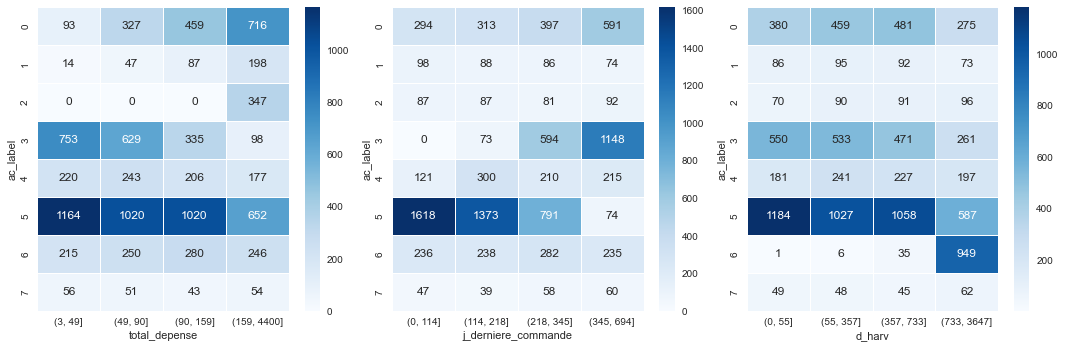

In [42]:
colonnes = ['total_depense', 'j_derniere_commande', 'd_harv']
table_cont(X,'ac_label',colonnes)

Une façon synthétique de voir la répartition des différents groupes au sein de la distribution des variables est de faire un tableau qui récapitule la différence relative des moyennes d'un groupe par rapport à l'ensemble des points, pour une variable donnée.


*Table by Sandy M.*

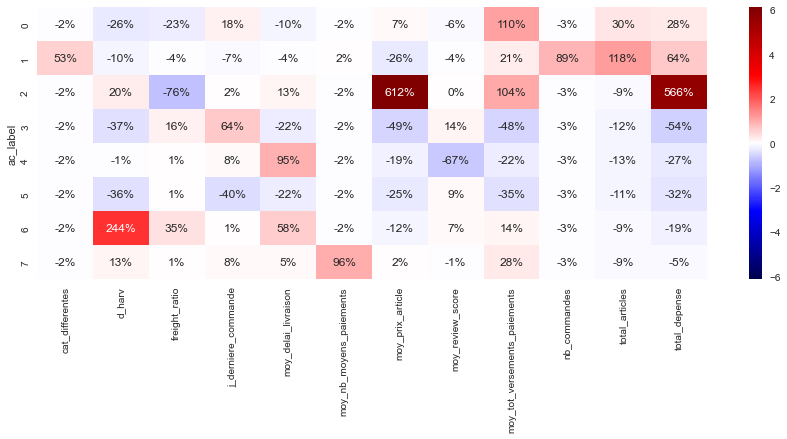

In [43]:
table_mean(X, 'ac_label')

Cette fois-ci les clusters sont un peu plus faciles à identifier. Mais cette matrice manque de nuance par rapport à la méthode des K-means. En y ajoutant un léger manque d'optimisation au niveau de la répartition des groupes, cette méthode, meilleure que la méthode DBSCAN pour notre problèmatique, est quand même moins performante que la méthode des K-means.

Pour la suite de l'étude, c'est la méthode des K-means avec 6 clusters qui sera retenue.

# T-SNE

La méthode t-SNE (t-distributed stochastic neighbor embedding) est une méthode de réduction de dimension, comme la PCA. A la différence qu'elle est non-linéaire. Elle se base sur les probabilités de proximité des points. L'algorithme construit une nouvelle représentation des données de telle sorte que les données proches dans l’espace original aient une probabilité élevée d’avoir des représentations proches dans le nouvel espace.

Il est intéressant de regarder si nos groupes engendrés par l'algorithme des K-means auraient été facilement identifiables avec cette méthode de réduction dimensionnelle.

## T-SNE Sans PCA

Nous utilisons l'algorithme T-SNE pour avoir une idée en première approche du nombre de groupes homogènes

In [44]:
X_tsne, X_tsne_sc = stdX(df_ss_cat)
X_tsne_sc.head(2)


*Fonction by Sandy M.*

nb_commandes  total_depense  moy_nb_moyens_paiements  \
70993     -0.167217      -0.286386                -0.155945   
46478     -0.167217      -0.565349                -0.155945   

       moy_tot_versements_paiements  moy_review_score  moy_delai_livraison  \
70993                     -0.358216          0.653753            -0.565833   
46478                     -0.720903          0.653753             1.504086   

       total_articles  freight_ratio  moy_prix_article  j_derniere_commande  \
70993       -0.266906      -0.372046         -0.235074            -1.487091   
46478       -0.266906       2.179598         -0.539466            -0.466823   

         d_harv  cat_differentes  
70993 -0.282192        -0.133169  
46478 -0.220602        -0.133169

In [45]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_tsne_sc)

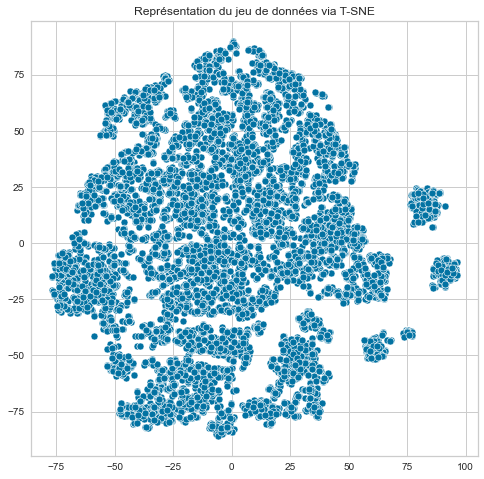

In [46]:
plt.figure(figsize=(8, 8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(T[:, 0], T[:, 1])
plt.show()

### Représentation des différents clusters trouvés par K-means

In [47]:
X_tsne_sc = tsne_kmeans(X_tsne_sc,6, T)
X_tsne_sc.head(2)

nb_commandes  total_depense  moy_nb_moyens_paiements  \
70993     -0.167217      -0.286386                -0.155945   
46478     -0.167217      -0.565349                -0.155945   

       moy_tot_versements_paiements  moy_review_score  moy_delai_livraison  \
70993                     -0.358216          0.653753            -0.565833   
46478                     -0.720903          0.653753             1.504086   

       total_articles  freight_ratio  moy_prix_article  j_derniere_commande  \
70993       -0.266906      -0.372046         -0.235074            -1.487091   
46478       -0.266906       2.179598         -0.539466            -0.466823   

         d_harv  cat_differentes  kmeans_label         T1         T2  
70993 -0.282192        -0.133169             2  14.858372  65.968475  
46478 -0.220602        -0.133169             0 -59.461452  28.540209

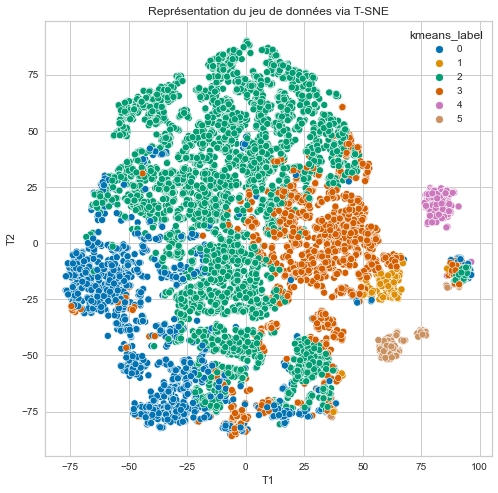

In [48]:
plt.figure(figsize=(8, 8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(data=X_tsne_sc,
                x='T1',
                y='T2',
                hue='kmeans_label',
                palette='colorblind')
plt.show()

Il est difficile de trouver des frontières claires dans le nouvel espace. Néanmoins, il est possible de voir que les clusters correspondent à différentes régions du nouvel espace, même beaucoup de points appartenant à des clusters différents se superposent.

## T-SNE avec PCA

In [49]:
pca = PCA(n_components=8)
X_tsne_pca = pd.DataFrame(
    pca.fit_transform(X_tsne_sc),
    index=X_tsne_sc.index,
    columns=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8'])

In [50]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_tsne_pca)

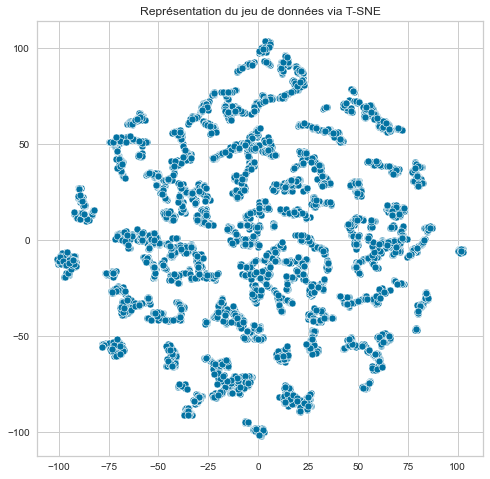

In [51]:
plt.figure(figsize=(8, 8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(T[:, 0], T[:, 1])
plt.show()

### Représentation des différents clusters trouvés par K-means

In [52]:
X_tsne_pca = tsne_kmeans(X_tsne_pca,6, T)
X_tsne_pca.head(2)

F1         F2        F3        F4        F5        F6        F7  \
70993  66.559349  11.484959 -0.039438 -0.057520 -0.144258 -1.396151 -0.317617   
46478  25.134205 -60.744001 -0.253190  0.661454  0.983502 -0.861501  0.415049   

             F8  kmeans_label         T1        T2  
70993  0.052906             1  41.871853  51.19804  
46478 -0.001741             5  31.314636  38.05212

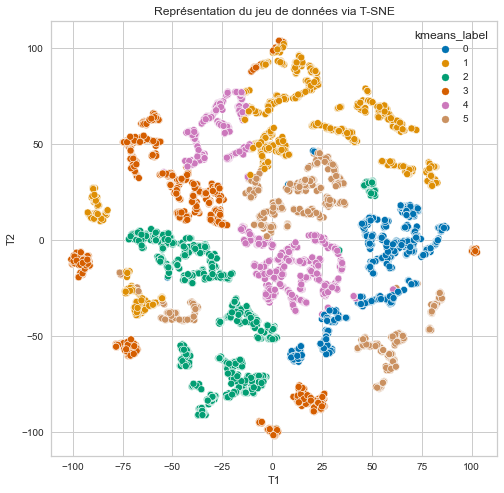

In [53]:
plt.figure(figsize=(8, 8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(data=X_tsne_pca,
                x='T1',
                y='T2',
                hue='kmeans_label',
                palette='colorblind')
plt.show()